# Classification

Utilizando o conjunto de dados de [Câncer de Mama Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

#### Carregando os dados

In [2]:
df = pd.read_csv('Dados/cancer_classification.csv')

#### Informações sobre os dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Descrição dos dados

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### Gráfico de Benignos vs Malignos

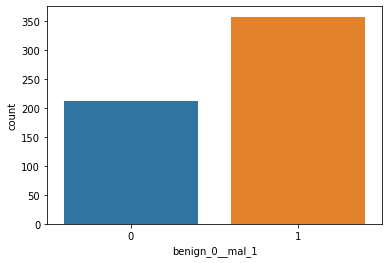

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

#### Primeiras 10 entradas de dados

In [8]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


#### Gráfico de Barras de correlação entre os atributos

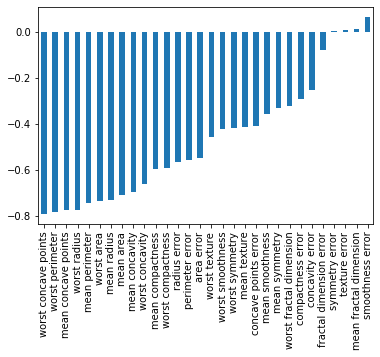

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

#### Heatmap de Correlação entre os atributos

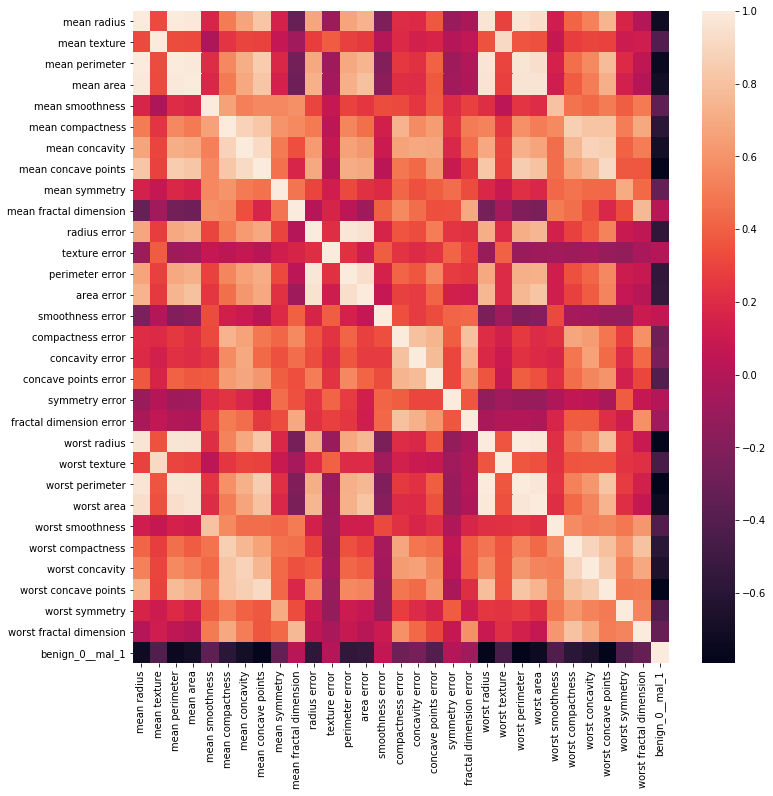

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

#### Obtendo os Dados X (Input) e y (Target)

In [15]:
X = df.drop('benign_0__mal_1',axis=1).values 
y = df['benign_0__mal_1'].values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#### Perfomando Scaling dos Dados

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

#### Construindo o Modelo

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Classificação Binária
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

#### Treinando o Modelo

In [25]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 27ms/step - loss: 0.6699 - val_loss: 0.6544
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6450 - val_loss: 0.6324
Epoch 3/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6198 - val_loss: 0.6039
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5890 - val_loss: 0.5682
Epoch 5/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5518 - val_loss: 0.5292
Epoch 6/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5127 - val_loss: 0.4840
Epoch 7/600
14/14 [==============================] - 0s 13ms/step - loss: 0.4623 - val_loss: 0.4293
Epoch 8/600
14/14 [==============================] - 0s 18ms/step - loss: 0.4143 - val_loss: 0.3822
Epoch 9/600
14/14 [==============================] - 0s 14ms/step - loss: 0.3703 - val_loss: 0.3414
Epoch 10/600
14/14 [==============================] - 0s 14ms/step - loss: 0.3340 - val_loss: 0.3066

#### Verificando Loss

In [26]:
losses = pd.DataFrame(model.history.history)

#### Está ocorrendo Overfitting

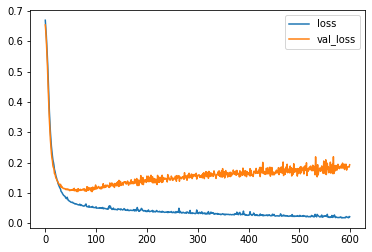

In [27]:
losses.plot()

#### Criando um novo Modelo com EarlyStopping

In [28]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Classificação Binária
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

#### Treinando o novo Modelo

In [31]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 24ms/step - loss: 0.6803 - val_loss: 0.6505
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6348 - val_loss: 0.6110
Epoch 3/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5960 - val_loss: 0.5705
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5544 - val_loss: 0.5273
Epoch 5/600
14/14 [==============================] - 0s 18ms/step - loss: 0.5106 - val_loss: 0.4798
Epoch 6/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4648 - val_loss: 0.4305
Epoch 7/600
14/14 [==============================] - 0s 13ms/step - loss: 0.4154 - val_loss: 0.3798
Epoch 8/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3729 - val_loss: 0.3372
Epoch 9/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3276 - val_loss: 0.2974
Epoch 10/600
14/14 [==============================] - 0s 15ms/step - loss: 0.2942 - val_loss: 0.2678


#### Visualizando Loss

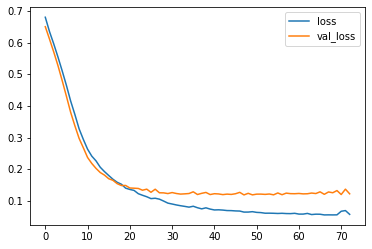

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

#### Criando um novo Modelo com Dropout

In [33]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# Classificação Binária
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

#### Treinando o Modelo com Dropout

In [34]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 18ms/step - loss: 0.6920 - val_loss: 0.6557
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6756 - val_loss: 0.6371
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6619 - val_loss: 0.6206
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.6351 - val_loss: 0.5994
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6235 - val_loss: 0.5788
Epoch 6/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5946 - val_loss: 0.5583
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.5555 - val_loss: 0.5277
Epoch 8/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5507 - val_loss: 0.4961
Epoch 9/600
14/14 [==============================] - 0s 14ms/step - loss: 0.5421 - val_loss: 0.4689
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.5152 - val_loss: 0.4409


#### Visualizando Loss

In [35]:
model_loss = pd.DataFrame(model.history.history)

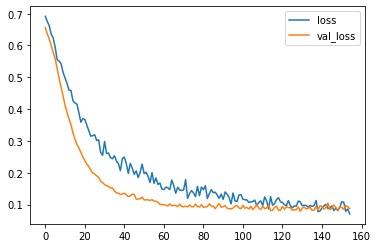

In [36]:
model_loss.plot()

#### Verificando o Desempenho do Modelo

- Classification Report
- Confusion Matrix

In [38]:
predictions = model.predict_classes(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [41]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 1 87]]
